# Houhold Active power consumption prediction using different methods 

## Load the dataset

#dataset source: https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption#

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('household_power_consumption.csv', header=0, 
                   infer_datetime_format=True, engine='c',
                   parse_dates=['datetime'], index_col=['datetime'])

In [3]:
dataset.shape

(2075259, 8)

In [4]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [5]:
#I have done preprocessing to replace the '?' in original dataset as np.nan
#using  dataset.replace('?', np.nan, inplace=True)
dataset.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
sub_metering_4           25979
dtype: int64

In [6]:
dataset.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
sub_metering_4           25979
dtype: int64

<AxesSubplot:>

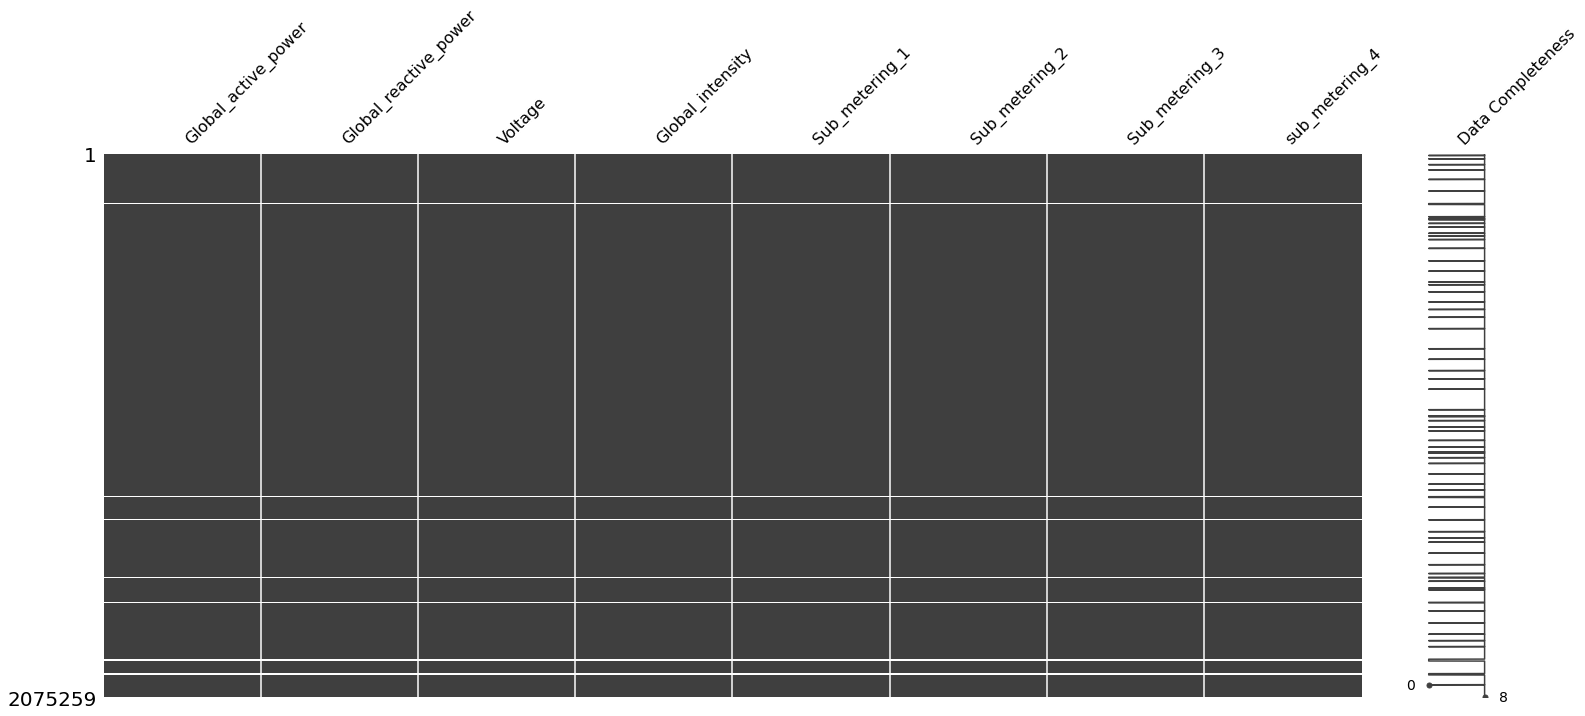

In [7]:
#See data completeness
import missingno as msno
msno.matrix(dataset, labels=True)

In [8]:
#using backfilling method to very rough preprocessing but usefull
dataset=dataset.fillna(method='backfill')

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
 7   sub_metering_4         float64
dtypes: float64(8)
memory usage: 142.5 MB


In [10]:
#Our task is to predict active power so we focus on this column first
dataset=dataset[['Global_active_power']]

In [11]:
#We can use either 1 hour resolution or 1 day resolution to fulfill our task
dataset_1hour_integrated=dataset.resample('H').sum()
dataset_1hour_integrated

,Global_active_power
datetime,
2006-12-16 17:00:00,152.024
2006-12-16 18:00:00,217.932
2006-12-16 19:00:00,204.014
2006-12-16 20:00:00,196.114
2006-12-16 21:00:00,183.388
...,...
2010-11-26 17:00:00,103.554
2010-11-26 18:00:00,94.408
2010-11-26 19:00:00,99.560


In [12]:
#This step is to trim dataset so that it starts from Monday 0:00 to Sunday 23:00
dataset_1hour_integrated['weekday']=dataset_1hour_integrated.index.weekday

In [13]:
#2006-12-18 00:00:00 Monday
dataset_1hour_integrated[5:50]

,Global_active_power,weekday
datetime,,
2006-12-16 22:00:00,132.008,5
2006-12-16 23:00:00,123.696,5
2006-12-17 00:00:00,112.948,6
2006-12-17 01:00:00,200.964,6
2006-12-17 02:00:00,95.236,6
2006-12-17 03:00:00,99.732,6
2006-12-17 04:00:00,132.946,6
2006-12-17 05:00:00,119.804,6
2006-12-17 06:00:00,78.198,6


In [14]:
#2010-11-21 23:00:00 Sunday
dataset_1hour_integrated[-120:-100]

,Global_active_power,weekday
datetime,,
2010-11-21 22:00:00,89.626,6
2010-11-21 23:00:00,18.190,6
2010-11-22 00:00:00,22.050,0
2010-11-22 01:00:00,16.792,0
2010-11-22 02:00:00,17.002,0
2010-11-22 03:00:00,16.496,0
2010-11-22 04:00:00,22.098,0
2010-11-22 05:00:00,17.154,0
2010-11-22 06:00:00,57.182,0


In [15]:
dataset_1hour_integrated=dataset_1hour_integrated[31:-118]

In [16]:
dataset_1hour_integrated.drop(columns=['weekday'],inplace=True)

I:\anaconda\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
#you can save it for future use
#dataset_1hour_integrated.to_csv('dataset_1hour_integrated.csv')

### view the trend

Text(0.5, 1.0, 'Global_active_power ')

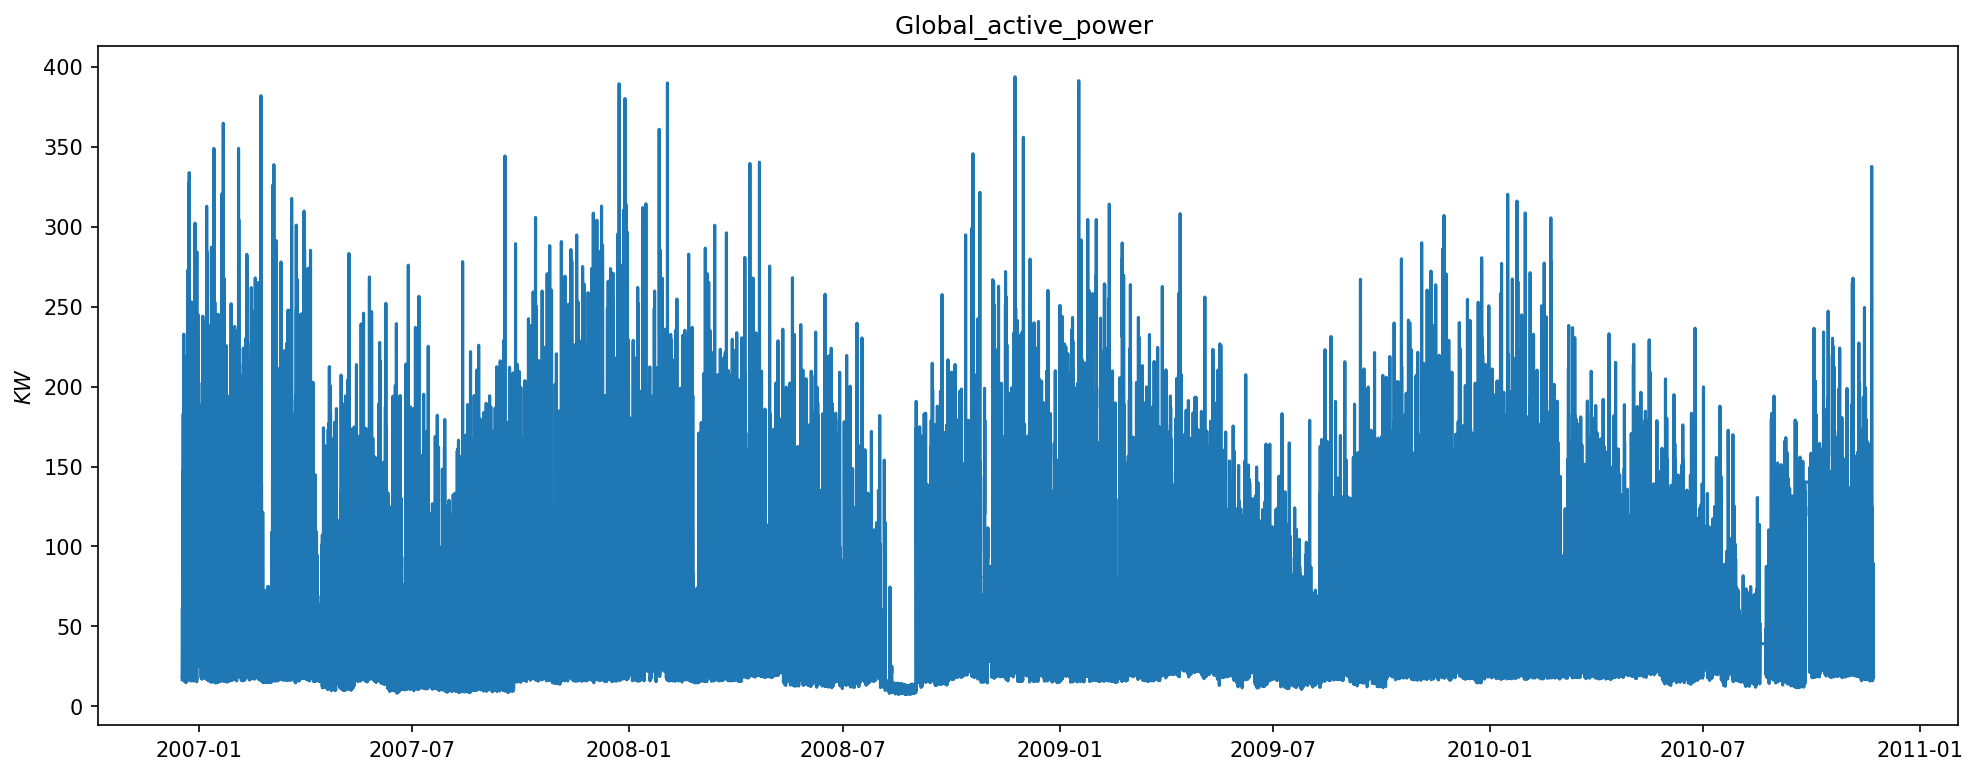

In [18]:
# because we want to predict the Global_active_power so we want to see if this column has some data misrecord
#first let us see the overall trend
plt.figure(figsize=(16,6), dpi=150)
plt.plot(dataset_1hour_integrated)
plt.ylabel(r'$KW$')
plt.title('Global_active_power ')

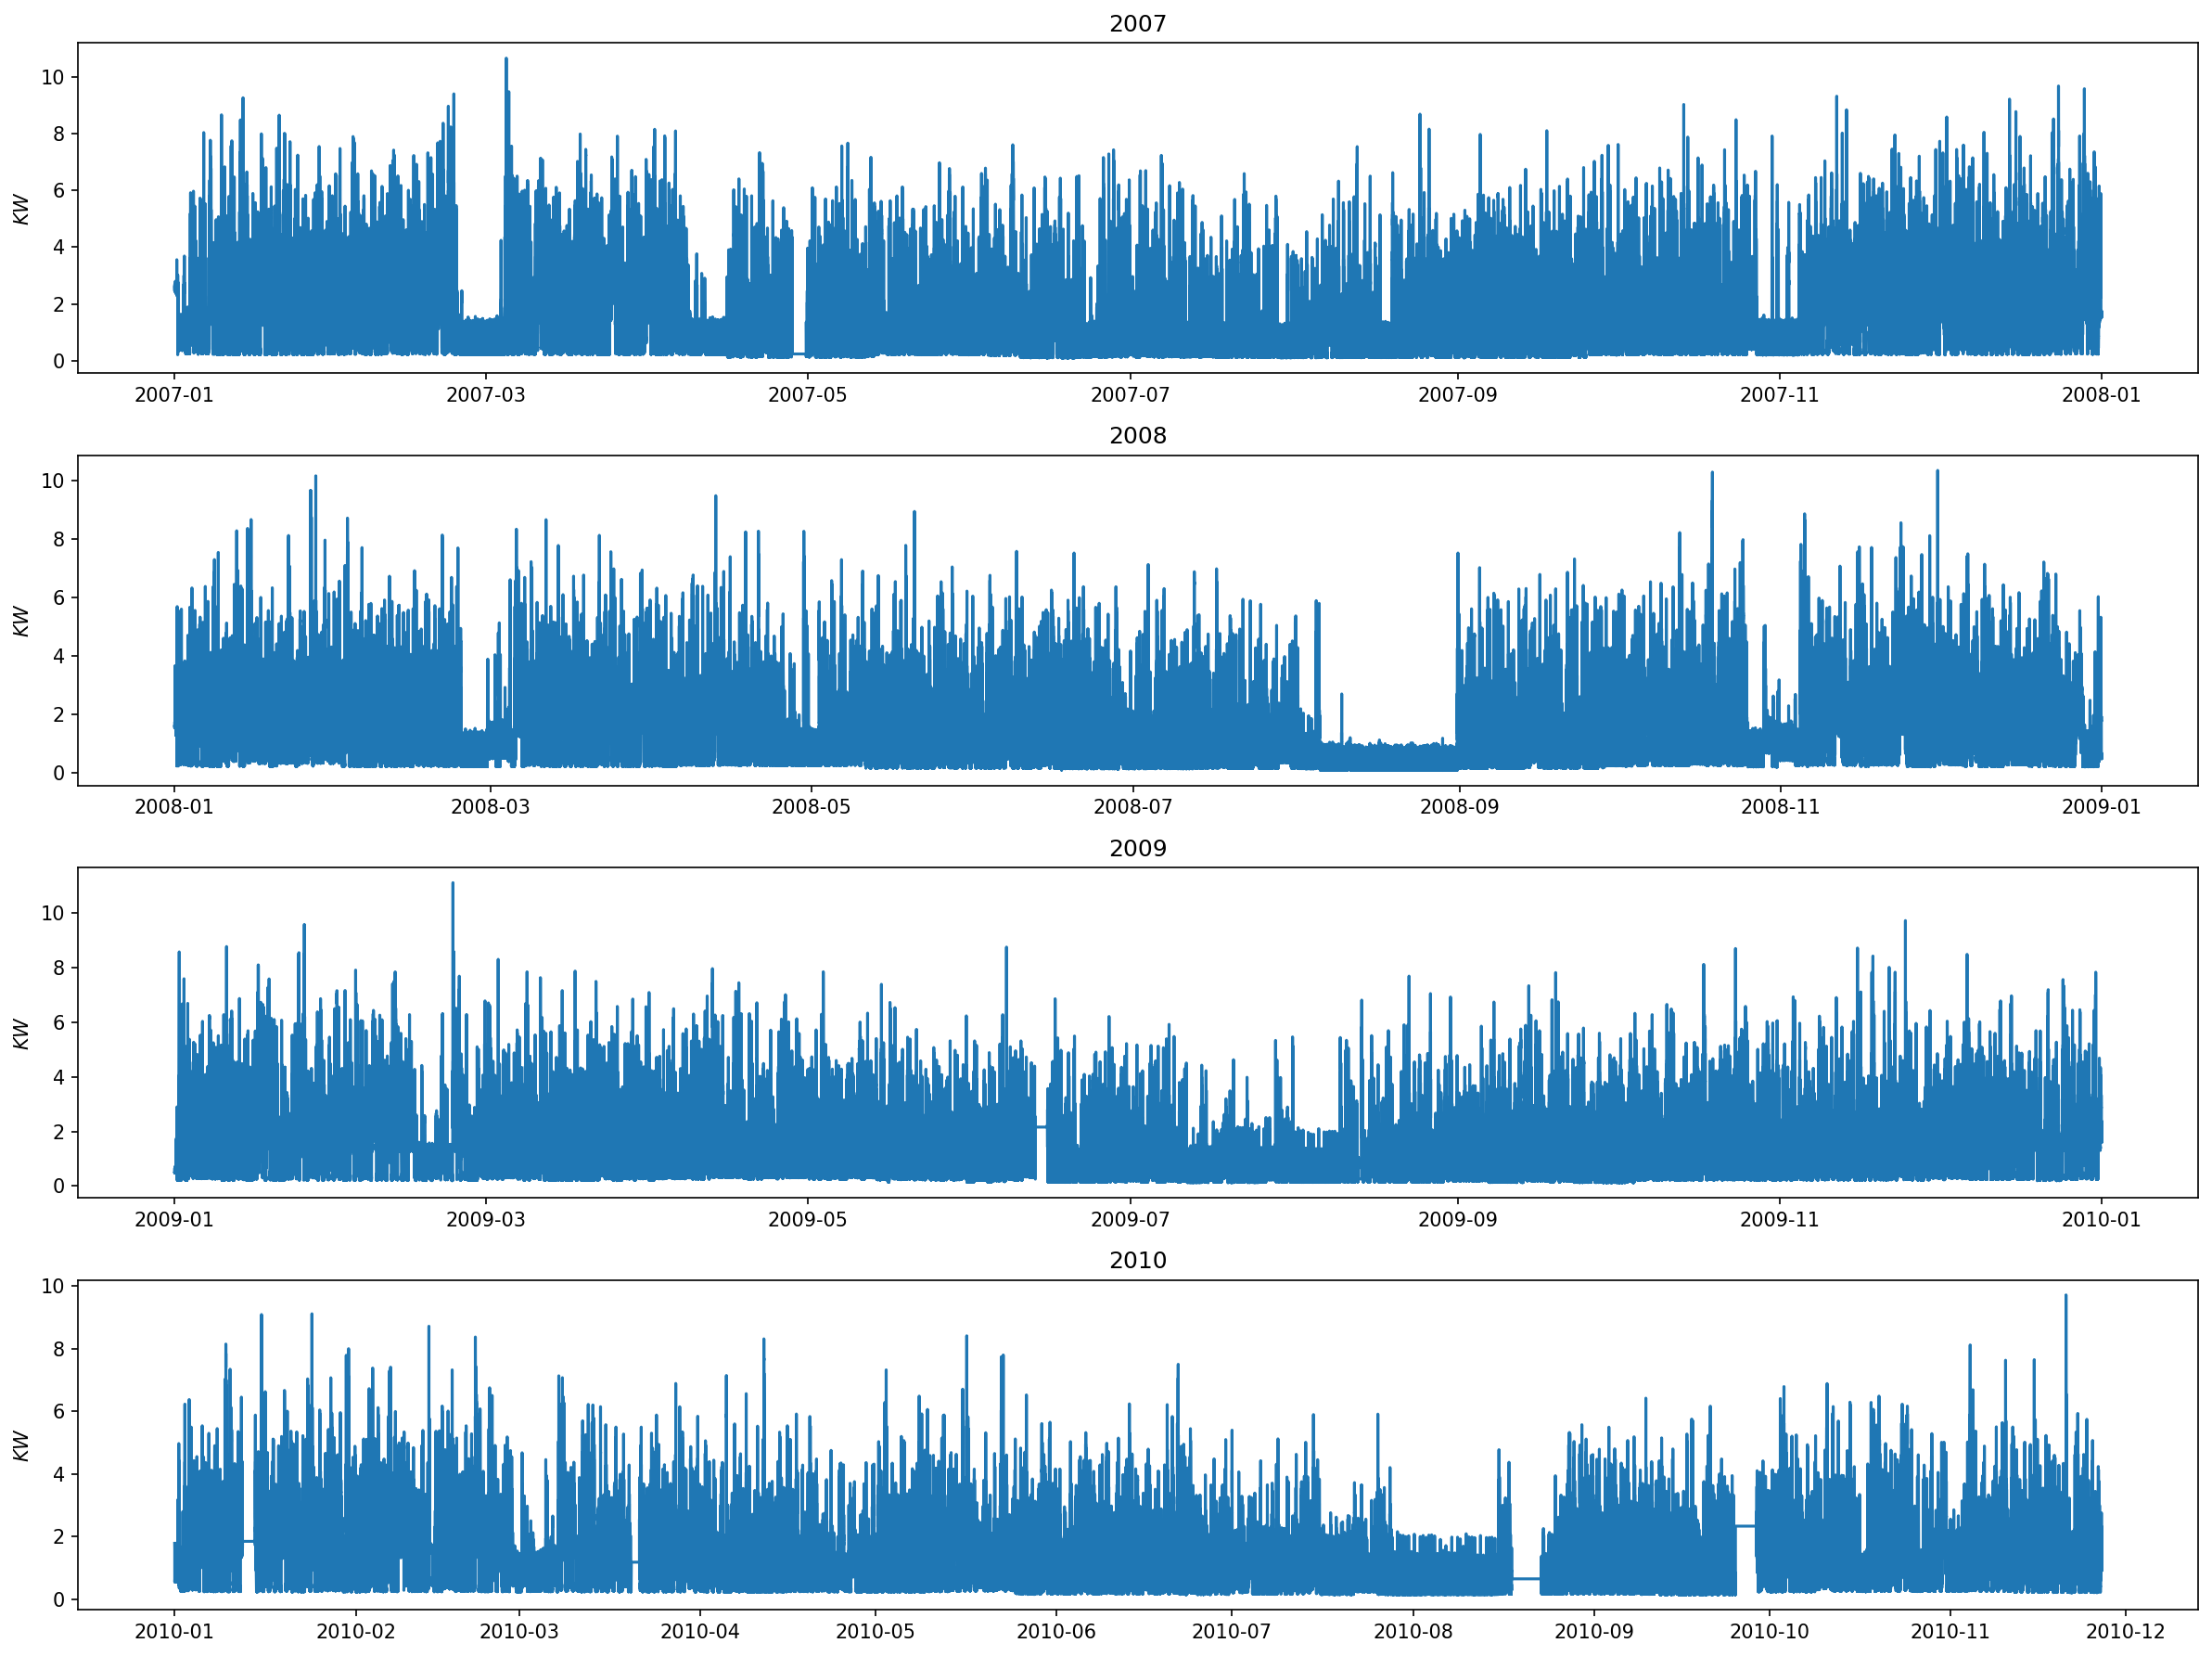

In [19]:
#plot year gap trend
plt.figure(figsize=(16,12), dpi=150)
years = ['2007', '2008', '2009', '2010']
for i in range(len(years)):
    ax= plt.subplot(len(years), 1, i+1)
    ax.set_ylabel(r'$KW$')
    year=years[i]
    year_data=dataset[str(year)] #use this way to select datas whose index satisfy the condition
    
    plt.plot(year_data['Global_active_power'])
    plt.title(str(year))
    
plt.tight_layout()
plt.show()

## Use CNN method

We devide it into two parts: one uses daily resolution dataset, the other one uses hourly resolution dataset

### Resample it to weekly dataset

In [20]:
dataset_1day_integrated=dataset_1hour_integrated.resample('D').sum()

In [21]:
dataset_1day_integrated

,Global_active_power
datetime,
2006-12-18,2203.826
2006-12-19,1666.194
2006-12-20,2225.748
2006-12-21,1717.116
2006-12-22,2341.338
...,...
2010-11-17,1582.032
2010-11-18,1652.152
2010-11-19,1570.400


### Split the train set and test set

In [22]:
#I split the dataset in this way because the first year has a relatively better data completeness(just choose the way you like)
def split_dataset(data):
    '''
    This function implements to divide the train set and test set by week
    '''
    # nearly 7:3 to divide the dataset
    train, test = data[420:], data[0:420]
    #divide data into weekly data
    train = np.array(np.split(train, len(train)/7)) 
    test = np.array(np.split(test, len(test)/7))
    return train, test


In [23]:
train_set,test_set = split_dataset(dataset_1day_integrated.values)

In [24]:
train_set.shape

(145, 7, 1)

In [25]:
test_set.shape

(60, 7, 1)

### Through some successful cases, using sliding window to increase the samples and letting samples have some overlapping would increase model accuracy

In [26]:
#manually increase 6 samples between two natural week
'''
Input parameter :
train : train_set
sw_width : sliding window width
in_start : start of the extracting dataset
'''
def sliding_window(train, sw_width=7, in_start=0):
    '''
    This function implements a sliding window with a window width of 7 and step width of 1
    In the future work, you could also modify the window width to see the change in performance
    '''
    #Flatten the samples in weeks to samples in days
    data = train.reshape((train.shape[0] * train.shape[1], train.shape[2])) 
    X, y = [], []
    
    for i in range(len(data)): 
        #set the out_end as the border to ensure the sample interception is complete
        in_end = in_start + sw_width
        out_end = in_end + sw_width
        # If the maximum element index does not exceed the original sequence index, the data is intercepted.Otherwise, the sample is discarded
        if out_end < len(data):
            train_seq = data[in_start:in_end, 0]
            train_seq = train_seq.reshape((len(train_seq), 1))
            X.append(train_seq)
            y.append(data[in_end:out_end, 0])
        in_start += 1
        
    return np.array(X), np.array(y)

In [27]:
# sliding window width, you can also set it equal to 7/14  to see the differences
sw_width= 7
#start indicator
in_start = 0

In [28]:
train_x,train_y=sliding_window(train_set,sw_width)

In [29]:
#145*7 -14= 1001
train_x.shape

(1001, 7, 1)

In [30]:
'''
you could clearly see the timestep
'''
print(train_x[0,:,0])
print(train_x[1,:,0])

[1692.016 1987.798 1900.498 1604.622 2005.208 2346.948 1933.368]
[1987.798 1900.498 1604.622 2005.208 2346.948 1933.368 1514.404]


In [31]:
train_y.shape

(1001, 7)

In [32]:
#Use this week to predict the next week
print(train_y[0,:])
print(train_y[1,:])

[1514.404 2126.916 2253.79  1633.85  1732.564 1836.594 1263.008]
[2126.916 2253.79  1633.85  1732.564 1836.594 1263.008  504.488]


In [33]:
import math
import sklearn.metrics as skm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Dropout
from tensorflow.keras.layers import Conv1D,MaxPooling1D

In [34]:
import tensorflow.keras.optimizers as opt

In [36]:
#This is most import part consisting of many hyperparameters to tune
#0.9
def cnn_model(train_x,train_y, sw_width,in_start=0, verbose_set=0, epochs_num=20, batch_size_set=4):
    '''
    This implements 1D CNN model
    Most of the time, you need to learn from some successful models and set a baseline, then adjust parameters one by one, 
    set an indicator, and gradually adjust the performance of the model ! Remember to record your tunning history ^^
    Most of time, cnn model consists of four layers, in which you have many hyperparameters to tune
    Convolution Layer:- number of kernels, kernel size, stride length, padding
    MaxPooling Layer:- kernel size, stride length, padding
    Dense Layer:- size
    Dropout:- Percentage to keep/drop
    '''
    #train_x, train_y = sliding_window(train,in_column, sw_width, in_start=0)
    
    n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
    
    model = Sequential()

    model.add(Conv1D(filters=32, kernel_size=2, activation='relu', 
                     input_shape=(n_timesteps, n_features)))
    model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
    #model.add(Dropout(0.1))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(75, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(units=n_outputs))
    
    model.compile(loss='MSE', optimizer= opt.Nadam(learning_rate=0.0002),metrics=['accuracy'])
    print(model.summary())
    
    history=model.fit(train_x, train_y,epochs=epochs_num, batch_size=batch_size_set, verbose=verbose_set)
    #plt.plot(history.history['loss'], label='Training loss')
    #plt.plot(history.history['val_loss'], label='Validation loss')
    #plt.show()
    #plt.plot(history.history['accuracy'], label='Accuracy')

    #plt.legend()
    return model

In [37]:
#you can also run this line to see the difference if we choose different batch_size or epochs_num
#model_CNN = cnn_model(train_set, sw_width,interest_column, in_start, verbose_set=0, epochs_num=20, batch_size_set=16)

In [38]:
model_CNN = cnn_model(train_x,train_y, sw_width, in_start, verbose_set=0, epochs_num=160, batch_size_set=4)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6, 32)             96        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 5, 32)             2080      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2, 32)             0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 75)                4875      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2280      
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 2

### you could use validation_set to control your model overfitting/underfitting condition through the curves 

In [39]:
#This is using this week's real data to predict data
#Try to think why this also works when you set sw_width=14  
def forecast(model, pred_seq, sw_width):
    '''
    This function implements the prediction for the training data
    Input parameters:
    model : cnn model in this case
    pre_seq : The original sequence. We get data for the last week of the input data and predict the next week
    sw_width : sliding window width
    in_column : interested column to predict. P_TOT in this case
    '''
    data = np.array(pred_seq)
    data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
    
    input_x = data[:sw_width, 0] 

    input_x = input_x.reshape((1, len(input_x), 1)) 

    yhat = model.predict(input_x, verbose=0) # predict next week data
    yhat = yhat[0][0:7] # get the vector we need
    
    return yhat


In [40]:
#This is using last week's real data to predict data
'''
def forecast(model, pred_seq, sw_width):

    data = np.array(pred_seq)
    data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
    
    input_x = data[-sw_width:, 0] 

    input_x = input_x.reshape((1, len(input_x), 1)) 

    yhat = model.predict(input_x, verbose=0) # predict next week data
    yhat = yhat[0][0:7] # get the vector we need

    return yhat

'''


'\ndef forecast(model, pred_seq, sw_width):\n\n    data = np.array(pred_seq)\n    data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))\n    \n    input_x = data[-sw_width:, 0] \n\n    input_x = input_x.reshape((1, len(input_x), 1)) \n\n    yhat = model.predict(input_x, verbose=0) # predict next week data\n    yhat = yhat[0][0:7] # get the vector we need\n\n    return yhat\n\n'

In [41]:
def evaluate_forecasts(actual, predicted):
    '''
    This function implements one or more weekly forecast losses based on expected values
    Idea: Count the RMSE of all single-day forecasts
    '''
    scores = list()
    #take predicted data compared with real data
    for i in range(actual.shape[1]):
        mse = skm.mean_squared_error(actual[:, i], predicted[:, i])
        rmse = math.sqrt(mse)
        scores.append(rmse)
    #calculate the whole rmse per day of the week
    s = 0 
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col]) ** 2
    score = math.sqrt(s / (actual.shape[0] * actual.shape[1]))
    print('actual.shape[0]:{}, actual.shape[1]:{}'.format(actual.shape[0], actual.shape[1]))
    return score, scores


In [42]:
#This corresponds to forcast function which uses this week's real data to predict
def evaluate_model(model, train, test, sd_width):
    '''
    Input parameters:
    model : cnn model in this case
    train : train_set
    test : test_set
    sd_width : prediction window width
    '''
    history_fore = [x for x in test]
    predictions = list() # for saving prediction results；
    for i in range(len(test)-int(sd_width/7)+1):
        yhat_sequence = forecast(model, history_fore, sd_width) # predict one week data
        predictions.append(yhat_sequence) 
        del history_fore[0] # Get real observations  and add them to history to predict the next week
    predictions = np.array(predictions) 
    score, scores = evaluate_forecasts(test[:, :, 0], predictions)
    return score, scores,predictions

In [43]:
#This corresponds to forcast function which uses last week's real data to predict
'''
def evaluate_model(model, train, test, sd_width):

    history_fore = [x for x in train]
    predictions = list() # for saving prediction results；
    for i in range(len(test)):
        yhat_sequence = forecast(model, history_fore, sd_width) # predict one week data
        predictions.append(yhat_sequence) 
        history_fore.append(test[i, :]) # Get real observations  and add them to history to predict the next week
    
    predictions = np.array(predictions) 
    score, scores = evaluate_forecasts(test[:, :, 0], predictions)
    return score, scores,predictions
'''



'\ndef evaluate_model(model, train, test, sd_width):\n\n    history_fore = [x for x in train]\n    predictions = list() # for saving prediction results；\n    for i in range(len(test)):\n        yhat_sequence = forecast(model, history_fore, sd_width) # predict one week data\n        predictions.append(yhat_sequence) \n        history_fore.append(test[i, :]) # Get real observations  and add them to history to predict the next week\n    \n    predictions = np.array(predictions) \n    score, scores = evaluate_forecasts(test[:, :, 0], predictions)\n    return score, scores,predictions\n'

In [44]:
def summarize_scores(name, score, scores):
    s_scores = ', '.join(['%.1f' % s for s in scores])
    print('%s: [%.3f] %s\n' % (name, score, s_scores))

In [45]:
days = [ 'mon', 'tue', 'wed', 'thr', 'fri', 'sat','sun']
name = 'cnn'

In [46]:
score_CNN, scores_CNN,pred_cnn = evaluate_model(model_CNN, train_set, test_set, sw_width)

actual.shape[0]:60, actual.shape[1]:7


In [47]:
summarize_scores(name, score_CNN, scores_CNN)

cnn: [476.260] 308.6, 428.4, 338.2, 350.1, 403.3, 566.3, 767.3



In [48]:
extend_size=pred_cnn.size
test_value = test_set[:,:,0].reshape(extend_size,1)
pre_value = pred_cnn.reshape(extend_size,1)

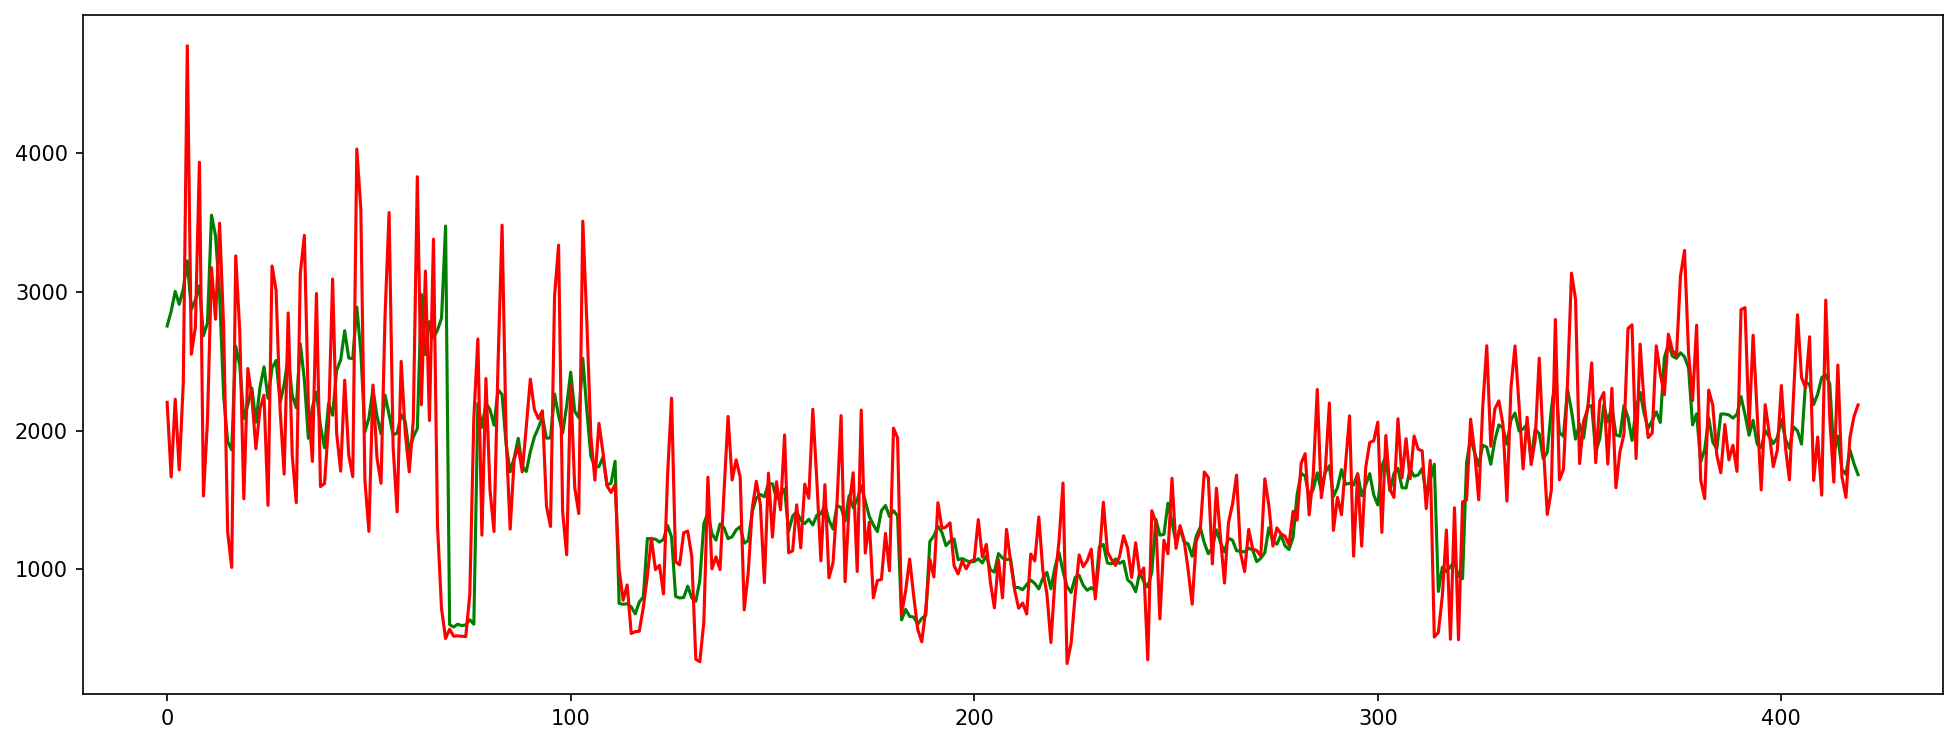

In [49]:
plt.figure(figsize=(16,6), dpi=150)
plt.plot(pre_value,'g')
plt.plot(test_value,'r')

In [50]:
def model_plot(score, scores, days, name):
    '''
    This function implements plot the RMSE performance
    '''
    plt.figure(figsize=(8,6), dpi=150)
    plt.plot(days, scores, marker='o', label=name)
    plt.grid(linestyle='--', alpha=0.5)
    plt.ylabel(r'$RMSE$', size=15)
    plt.title('CNN model prediction performance(resolution of 1 day)',  size=18)
    plt.legend()
    plt.show()

In [51]:
#model_plot(score_CNN, scores_CNN, days, name)

### Sliding window works on hour data

In [52]:
# We only  implement this in CNN, the similar procedure you can do it in the LSTM

In [53]:
def split_dataset_2(data):
    '''
    This function implements to divide the train set and test set by week
    '''
    # nearly 7:3 to divide the dataset
    train, test = data[0:-10080], data[-10080:]
    #divide data into weekly data
    train = np.array(np.split(train, len(train)/24)) 
    test = np.array(np.split(test, len(test)/24))
    return train, test


In [54]:
def split_dataset_2(data):
    '''
    This function implements to divide the train set and test set by week
    '''
    # nearly 7:3 to divide the dataset
    train, test = data[10080:], data[0:10080]
    #divide data into weekly data
    train = np.array(np.split(train, len(train)/24)) 
    test = np.array(np.split(test, len(test)/24))
    return train, test


In [55]:
train_set_2,test_set_2 = split_dataset_2(dataset_1hour_integrated.values)

In [56]:
test_set_2.shape

(420, 24, 1)

In [57]:
#This sliding method doesn't have an overlapping in the dataset
def sliding_window_2(train, in_start=0):
    '''
    This function implements a sliding window with a window width of 7 and step width of 1
    In the future work, you could also modify the window width to see the change in performance
    '''
    #Flatten the samples in weeks to samples in days
    data = train.reshape((train.shape[0] * train.shape[1], train.shape[2])) 
    X, y = [], []
    
    for i in range(len(data)): 
        #set the out_end as the border to ensure the sample interception is complete
        in_end = in_start + 24
        out_end = in_end + 24
        # If the maximum element index does not exceed the original sequence index, the data is intercepted.Otherwise, the sample is discarded
        if out_end < len(data):
            train_seq = data[in_start:in_end, 0]
            train_seq = train_seq.reshape((len(train_seq), 1))
            X.append(train_seq)
            y.append(data[in_end:out_end, 0])
        in_start += 24
        
    return np.array(X), np.array(y)

In [58]:
train_x_2,train_y_2=sliding_window_2(train_set_2)

In [59]:
#dataset_1hour_integrated[0:48]

In [60]:
train_x_2.shape

(1013, 24, 1)

In [61]:
train_y_2.shape

(1013, 24)

In [62]:
#print(train_x_2[0,:,:])
#print(train_x_2[1,:,:])

In [63]:
#This is most import part consisting of many hyperparameters to tune
#0.9
def cnn_model_2(train_x,train_y,in_start=0, verbose_set=0, epochs_num=20, batch_size_set=4):
    '''
    This implements 1D CNN model
    Most of the time, you need to learn from some successful models and set a baseline, then adjust parameters one by one, 
    set an indicator, and gradually adjust the performance of the model ! Remember to record your tunning history ^^
    Most of time, cnn model consists of four layers, in which you have many hyperparameters to tune
    Convolution Layer:- number of kernels, kernel size, stride length, padding
    MaxPooling Layer:- kernel size, stride length, padding
    Dense Layer:- size
    Dropout:- Percentage to keep/drop
    '''
    #train_x, train_y = sliding_window(train,in_column, sw_width, in_start=0)
    
    n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
    
    model = Sequential()

    model.add(Conv1D(filters=16, kernel_size=3, activation='relu', 
                     input_shape=(n_timesteps, n_features)))
    
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(30, activation='relu'))
    model.add(Dense(units=n_outputs))
    
    model.compile(loss='MSE', optimizer= opt.Nadam(learning_rate=0.0001),metrics=['accuracy'])
    print(model.summary())
    
    history=model.fit(train_x, train_y,epochs=epochs_num, batch_size=batch_size_set, verbose=verbose_set)
    #plt.plot(history.history['accuracy'], label='Accuracy')
    #plt.legend()
    return model

In [64]:
model_CNN_2 = cnn_model_2(train_x_2,train_y_2, in_start, verbose_set=0, epochs_num=80, batch_size_set=4)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 22, 16)            64        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 11, 16)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 176)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 30)                5310      
_________________________________________________________________
dense_4 (Dense)              (None, 24)                744       
Total params: 6,118
Trainable params: 6,118
Non-trainable params: 0
_________________________________________________________________
None


In [65]:
#This is using this week's real data to predict data
#Try to think why this also works when you set sw_width=14  
def forecast_2(model, pred_seq):
    '''
    This function implements the prediction for the training data
    Input parameters:
    model : cnn model in this case
    pre_seq : The original sequence. We get data for the last week of the input data and predict the next week
    sw_width : sliding window width
    in_column : interested column to predict. P_TOT in this case
    '''
    data = np.array(pred_seq)
    data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
    
    input_x = data[:24, 0] 

    input_x = input_x.reshape((1, len(input_x), 1)) 

    yhat = model.predict(input_x, verbose=0) # predict next week data
    yhat = yhat[0][0:24] # get the vector we need
    
    return yhat


In [66]:
def evaluate_model_2(model, train, test):
    '''
    Input parameters:
    model : cnn model in this case
    train : train_set
    test : test_set
    sd_width : prediction window width
    '''
    history_fore = [x for x in test]
    predictions = list() # for saving prediction results；
    for i in range(len(test)):
        yhat_sequence = forecast_2(model, history_fore) # predict one day data
        predictions.append(yhat_sequence) 
        del history_fore[0] # Get real observations  and add them to history to predict the next day
    predictions = np.array(predictions) 
    #score, scores = evaluate_forecasts(test[:, :, 0], predictions)
    return predictions

In [67]:
pred_cnn_2 = evaluate_model_2(model_CNN_2, train_set_2, test_set_2)

In [68]:
pred_cnn_2.shape

(420, 24)

In [69]:
pred_cnn_days=[sum(i) for i in pred_cnn_2]

In [70]:
test_cnn_days=[sum(i) for i in test_set_2]

In [71]:
score_CNN_2,scores_CNN_2=evaluate_forecasts(np.array(test_cnn_days).reshape(60,7,1),np.array(pred_cnn_days).reshape(60,7,1))

actual.shape[0]:60, actual.shape[1]:7


In [72]:
name='cnn : hourly resolution'
summarize_scores(name, score_CNN_2, scores_CNN_2)

cnn : hourly resolution: [270.186] 206.6, 267.9, 239.4, 211.5, 230.6, 312.4, 379.1



In [73]:
len(test_cnn_days)

420

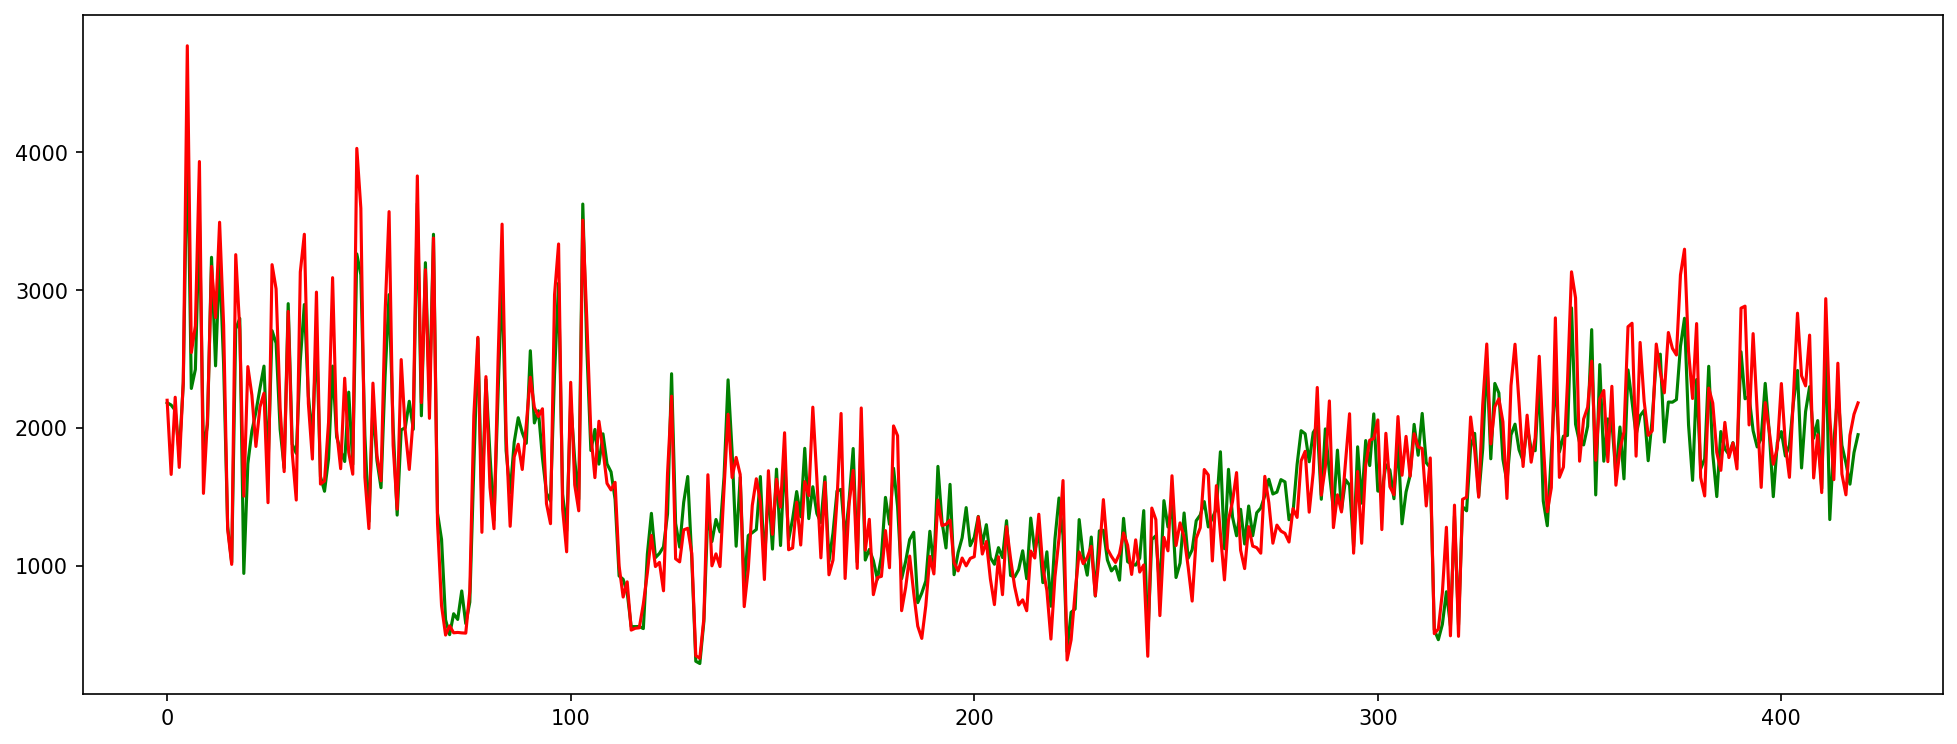

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6), dpi=150)
plt.plot(pred_cnn_days,'g')
plt.plot(test_cnn_days,'r')

### My Second approach would be to use LSTM

In [75]:
# some methods are the same

In [76]:
from tensorflow.keras.layers import LSTM

In [77]:
import tensorflow.keras.optimizers as opt

In [78]:
def lstm_model(train_x,train_y, sw_width, in_start=0, verbose_set=0, epochs_num=20, batch_size_set=4):
    '''
    This function implements the LSTM model
    '''
    #train_x, train_y = sliding_window(train, sw_width, in_start=0)
    
    n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
    
    model = Sequential()
    model.add(LSTM(128, activation='relu', 
                   input_shape=(n_timesteps, n_features)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(n_outputs))
    
    model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    
    history=model.fit(train_x, train_y,
              epochs=epochs_num, batch_size=batch_size_set, verbose=verbose_set)
    #plt.plot(history.history['accuracy'], label='Accuracy')
    #plt.show()
    return model

In [79]:
model_LSTM= lstm_model(train_x,train_y, sw_width, in_start, verbose_set=0, epochs_num=160, batch_size_set=4)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 231       
Total params: 77,127
Trainable params: 77,127
Non-trainable params: 0
_________________________________________________________________
None


In [80]:
score_LSTM, scores_LSTM,pred_lstm = evaluate_model(model_LSTM, train_set, test_set, sw_width)

actual.shape[0]:60, actual.shape[1]:7


In [81]:
name = 'LSTM'

In [82]:
summarize_scores(name, score_LSTM, scores_LSTM)

LSTM: [494.365] 449.0, 511.6, 388.2, 503.5, 403.1, 613.1, 552.2



In [83]:
extend_size=pred_lstm.size
pre_value = pred_lstm.reshape(extend_size,1)

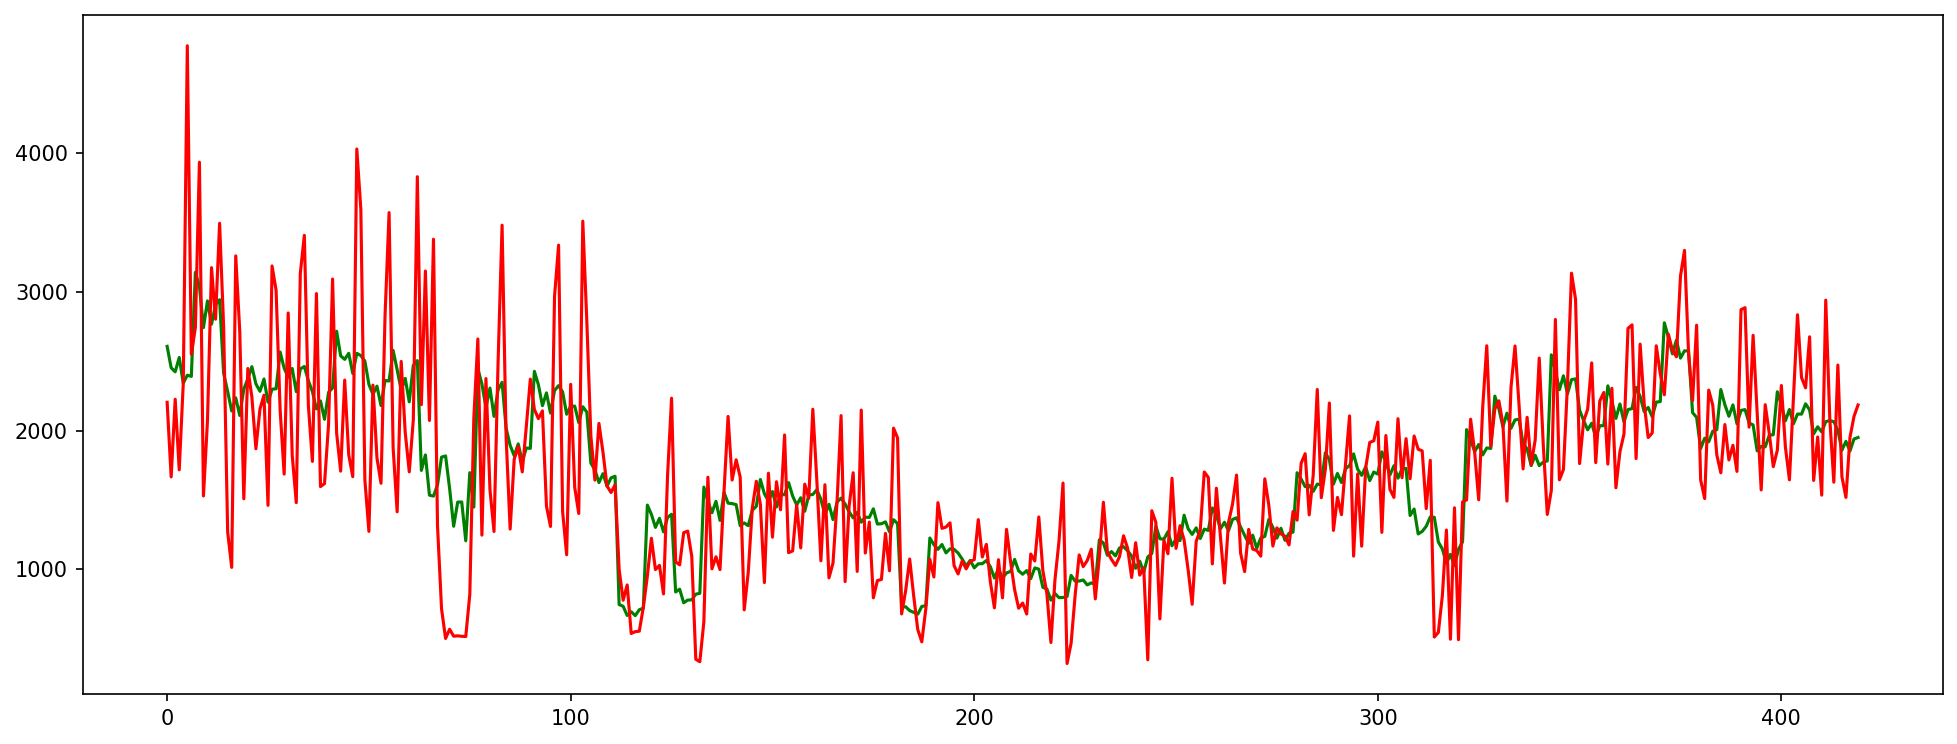

In [84]:
plt.figure(figsize=(16,6), dpi=150)
plt.plot(pre_value,'g')
plt.plot(test_value,'r')

In [85]:
def model_plot_LSTM(score, scores, days, name):
    '''
    This function implements plotting the RMSE curve for LSTM model
    '''
    plt.figure(figsize=(8,6), dpi=150)
    plt.plot(days, scores, marker='o', label=name)
    plt.grid(linestyle='--', alpha=0.5)
    plt.ylabel(r'$RMSE$', size=15)
    plt.title('LSTM model prediction result',  size=18)
    plt.legend()
    plt.show()

In [86]:
#model_plot_LSTM(score_LSTM, scores_LSTM, days, name)

## Approach: fbplohet (an open source software for focasting at scale )

In [87]:
#https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [88]:
dataset_1hour_temp_fbplohet=dataset_1hour_integrated.reset_index()

In [89]:
# In the manual we know we need to reshape the input data to two columns 'ds' for datetime, 'y' for label data
dataset_1hour_fbplohet=dataset_1hour_temp_fbplohet.rename(columns={'datetime':'ds','Global_active_power':'y'})

In [90]:
dataset_1hour_fbplohet

,ds,y
0,2006-12-18 00:00:00,16.582
1,2006-12-18 01:00:00,18.798
2,2006-12-18 02:00:00,17.068
3,2006-12-18 03:00:00,18.596
4,2006-12-18 04:00:00,61.580
...,...,...
34435,2010-11-21 19:00:00,17.728
34436,2010-11-21 20:00:00,36.286
34437,2010-11-21 21:00:00,73.278
34438,2010-11-21 22:00:00,89.626


In [91]:
train_set_fbplohet,test_set_fbplohet=dataset_1hour_fbplohet[:-10368],dataset_1hour_fbplohet[-10368:]

In [92]:
test_set_fbplohet

,ds,y
24072,2009-09-16 00:00:00,21.156
24073,2009-09-16 01:00:00,23.068
24074,2009-09-16 02:00:00,17.450
24075,2009-09-16 03:00:00,17.874
24076,2009-09-16 04:00:00,18.334
...,...,...
34435,2010-11-21 19:00:00,17.728
34436,2010-11-21 20:00:00,36.286
34437,2010-11-21 21:00:00,73.278
34438,2010-11-21 22:00:00,89.626


In [93]:
from fbprophet import Prophet
# define the model
model = Prophet(daily_seasonality=True)
#add country holiday
model.add_country_holidays(country_name='FR')
# fit the model
model.fit(train_set_fbplohet)

Importing plotly failed. Interactive plots will not work.


In [94]:
forecast=model.predict(test_set_fbplohet[['ds']])
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10368 entries, 0 to 10367
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          10368 non-null  datetime64[ns]
 1   trend                       10368 non-null  float64       
 2   yhat_lower                  10368 non-null  float64       
 3   yhat_upper                  10368 non-null  float64       
 4   trend_lower                 10368 non-null  float64       
 5   trend_upper                 10368 non-null  float64       
 6   Armistice 1918              10368 non-null  float64       
 7   Armistice 1918_lower        10368 non-null  float64       
 8   Armistice 1918_upper        10368 non-null  float64       
 9   Armistice 1945              10368 non-null  float64       
 10  Armistice 1945_lower        10368 non-null  float64       
 11  Armistice 1945_upper        10368 non-null  float64   

In [95]:
#to show the result in a smaller scale, I decide to sum up to daily data to show the prediction result
pre_fbplohet=np.array(forecast['yhat']).reshape(432,24)
test_fbplohet=np.array(test_set_fbplohet['y']).reshape(432,24)

In [96]:
pre_fbplohet_days=[sum(i) for i in pre_fbplohet]
test_fbplohet_days=[sum(i) for i in test_fbplohet]

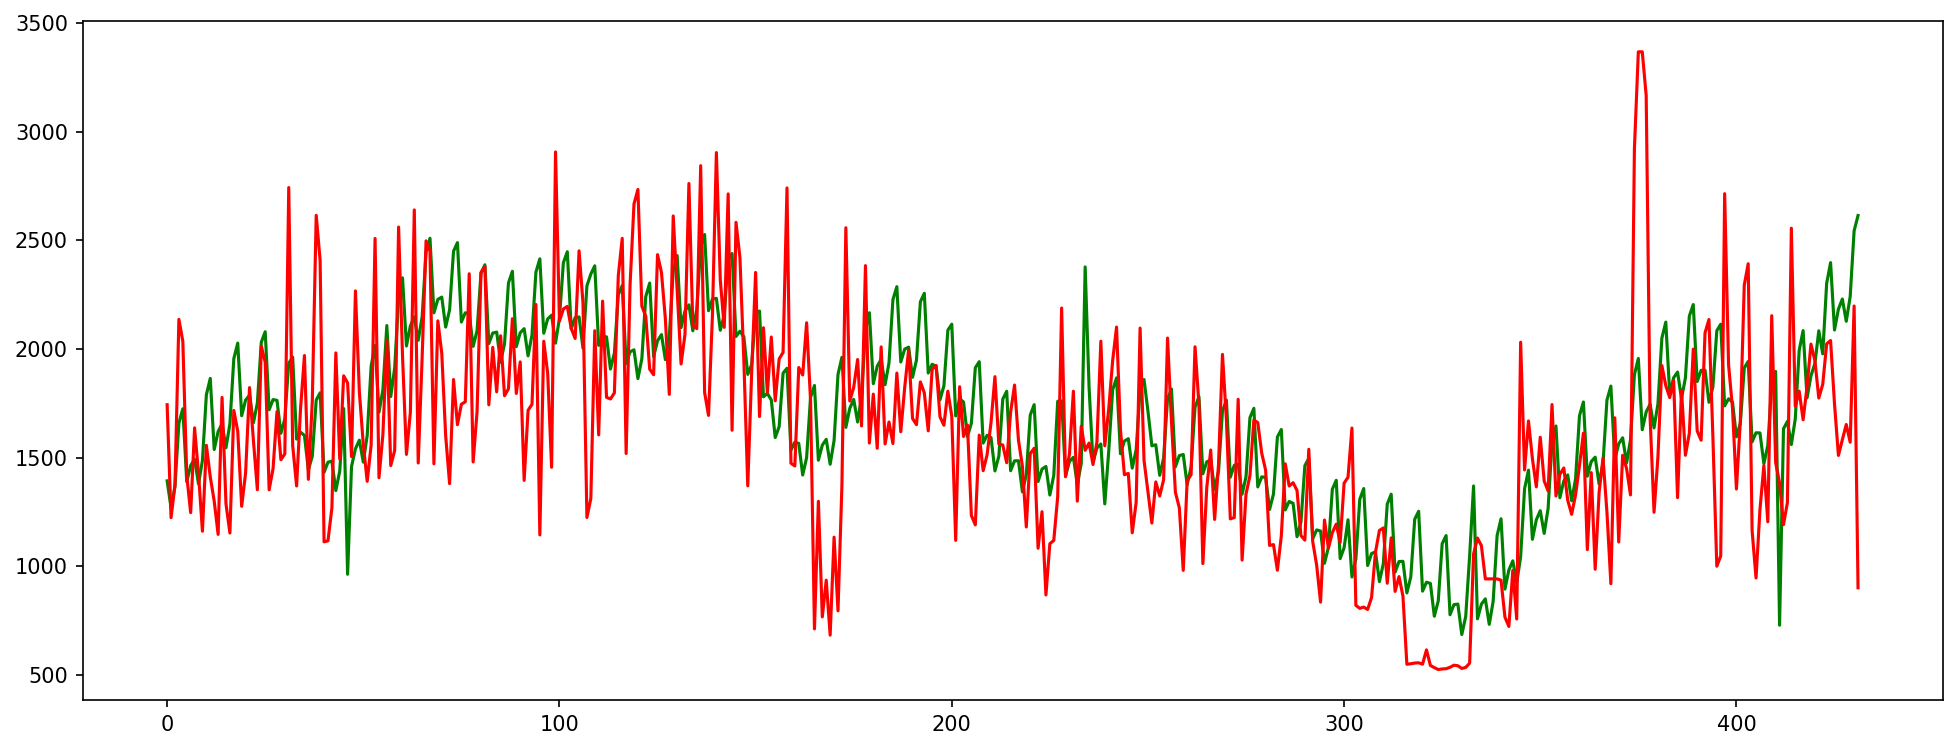

In [97]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6), dpi=150)
plt.plot(pre_fbplohet_days,'g')
plt.plot(test_fbplohet_days,'r')

## Approach: Xgboost (mannually add more labels to the dataset)

In [98]:
import xgboost as xgb
from xgboost import plot_importance

In [99]:
#To make the xgboost has a better performance we need to add as many labels as possible to the dataset
def addFlag(df):
    df['flag_year_2006']=np.where(df.index.year==2006,1,0)
    df['flag_year_2007']=np.where(df.index.year==2007,1,0)
    df['flag_year_2008']=np.where(df.index.year==2008,1,0)
    df['flag_year_2009']=np.where(df.index.year==2009,1,0)
    df['flag_month_spring']=np.where((df.index.month==3 )|(df.index.month== 4) | (df.index.month==5),1,0)
    df['flag_month_summer']=np.where((df.index.month==6 )|(df.index.month== 7) | (df.index.month==8),1,0)
    df['flag_month_autumn']=np.where((df.index.month==9 )|(df.index.month== 10) | (df.index.month==11),1,0)
    #df['flag_month_winter']=np.where(df['index'].dt.month==12 | 1 | 2,1,0)
    df['flag_day_weekend']=np.where((df.index.weekday==5) |(df.index.weekday==6) ,1,0)

In [100]:
dataset_1day_xgboost=dataset_1day_integrated.copy(deep=True)

In [101]:
#In the tree decision model, The data is normalized because difference in dimensions for different attributes may make the results worse
from sklearn.preprocessing import StandardScaler
scaler_xgboost = StandardScaler()
scaler_xgboost.fit(dataset_1day_xgboost[['Global_active_power']])
dataset_1day_xgboost['Global_active_power']=scaler_xgboost.transform(dataset_1day_xgboost[['Global_active_power']])

In [102]:
dataset_1day_xgboost

,Global_active_power
datetime,
2006-12-18,1.034939
2006-12-19,0.151963
2006-12-20,1.070942
2006-12-21,0.235595
2006-12-22,1.260781
...,...
2010-11-17,0.013741
2010-11-18,0.128902
2010-11-19,-0.005363


In [103]:
addFlag(dataset_1day_xgboost)
dataset_1day_xgboost

,Global_active_power,flag_year_2006,flag_year_2007,flag_year_2008,flag_year_2009,flag_month_spring,flag_month_summer,flag_month_autumn,flag_day_weekend
datetime,,,,,,,,,
2006-12-18,1.034939,1,0,0,0,0,0,0,0
2006-12-19,0.151963,1,0,0,0,0,0,0,0
2006-12-20,1.070942,1,0,0,0,0,0,0,0
2006-12-21,0.235595,1,0,0,0,0,0,0,0
2006-12-22,1.260781,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2010-11-17,0.013741,0,0,0,0,0,0,1,0
2010-11-18,0.128902,0,0,0,0,0,0,1,0
2010-11-19,-0.005363,0,0,0,0,0,0,1,0


In [104]:
dataset_1day_xgboost['shift_Global_active_power']=dataset_1day_xgboost['Global_active_power'].shift(periods=7)
dataset_1day_xgboost

,Global_active_power,flag_year_2006,flag_year_2007,flag_year_2008,flag_year_2009,flag_month_spring,flag_month_summer,flag_month_autumn,flag_day_weekend,shift_Global_active_power
datetime,,,,,,,,,,
2006-12-18,1.034939,1,0,0,0,0,0,0,0,NaN
2006-12-19,0.151963,1,0,0,0,0,0,0,0,NaN
2006-12-20,1.070942,1,0,0,0,0,0,0,0,NaN
2006-12-21,0.235595,1,0,0,0,0,0,0,0,NaN
2006-12-22,1.260781,1,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...
2010-11-17,0.013741,0,0,0,0,0,0,1,0,0.612377
2010-11-18,0.128902,0,0,0,0,0,0,1,0,0.328348
2010-11-19,-0.005363,0,0,0,0,0,0,1,0,0.432193


In [105]:
dataset_1day_xgboost=dataset_1day_xgboost[7:]

In [106]:
train_setx=dataset_1day_xgboost[dataset_1day_xgboost.columns.drop('shift_Global_active_power')]
train_setx

,Global_active_power,flag_year_2006,flag_year_2007,flag_year_2008,flag_year_2009,flag_month_spring,flag_month_summer,flag_month_autumn,flag_day_weekend
datetime,,,,,,,,,
2006-12-25,1.920644,1,0,0,0,0,0,0,0
2006-12-26,3.876656,1,0,0,0,0,0,0,0
2006-12-27,-0.073750,1,0,0,0,0,0,0,0
2006-12-28,0.819483,1,0,0,0,0,0,0,0
2006-12-29,2.628940,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2010-11-17,0.013741,0,0,0,0,0,0,1,0
2010-11-18,0.128902,0,0,0,0,0,0,1,0
2010-11-19,-0.005363,0,0,0,0,0,0,1,0


In [107]:
train_sety=dataset_1day_xgboost[['shift_Global_active_power']]

In [108]:
X_train_xgboost=train_setx.iloc[0:-420]
X_test_xgboost=train_setx.iloc[-420:]
y_train_xgboost=train_sety.iloc[0:-420]
y_test_xgboost=train_sety.iloc[-420:]

In [109]:
params = {
    'booster':'gbtree',
    'objective':'reg:squarederror',
    'tree_method':'hist',
    'gamma':0.05,
    'max_depth':6,
    'lambda':2,
    'colsample_bytree':0.7,
    'min_child_weight':3,
    'eta':0.2,
    'seed':1000,
}
plst = list(params.items())

In [110]:
dtrain=xgb.DMatrix(X_train_xgboost,y_train_xgboost)

In [111]:
model_xgboost=xgb.train(plst,dtrain,500)

In [112]:
dtest=xgb.DMatrix(X_test_xgboost)

In [113]:
pre_xgboost=model_xgboost.predict(dtest)

In [114]:
pre_xgboost_real=scaler_xgboost.inverse_transform(pre_xgboost)
test_xgboost_real=scaler_xgboost.inverse_transform(y_test_xgboost)

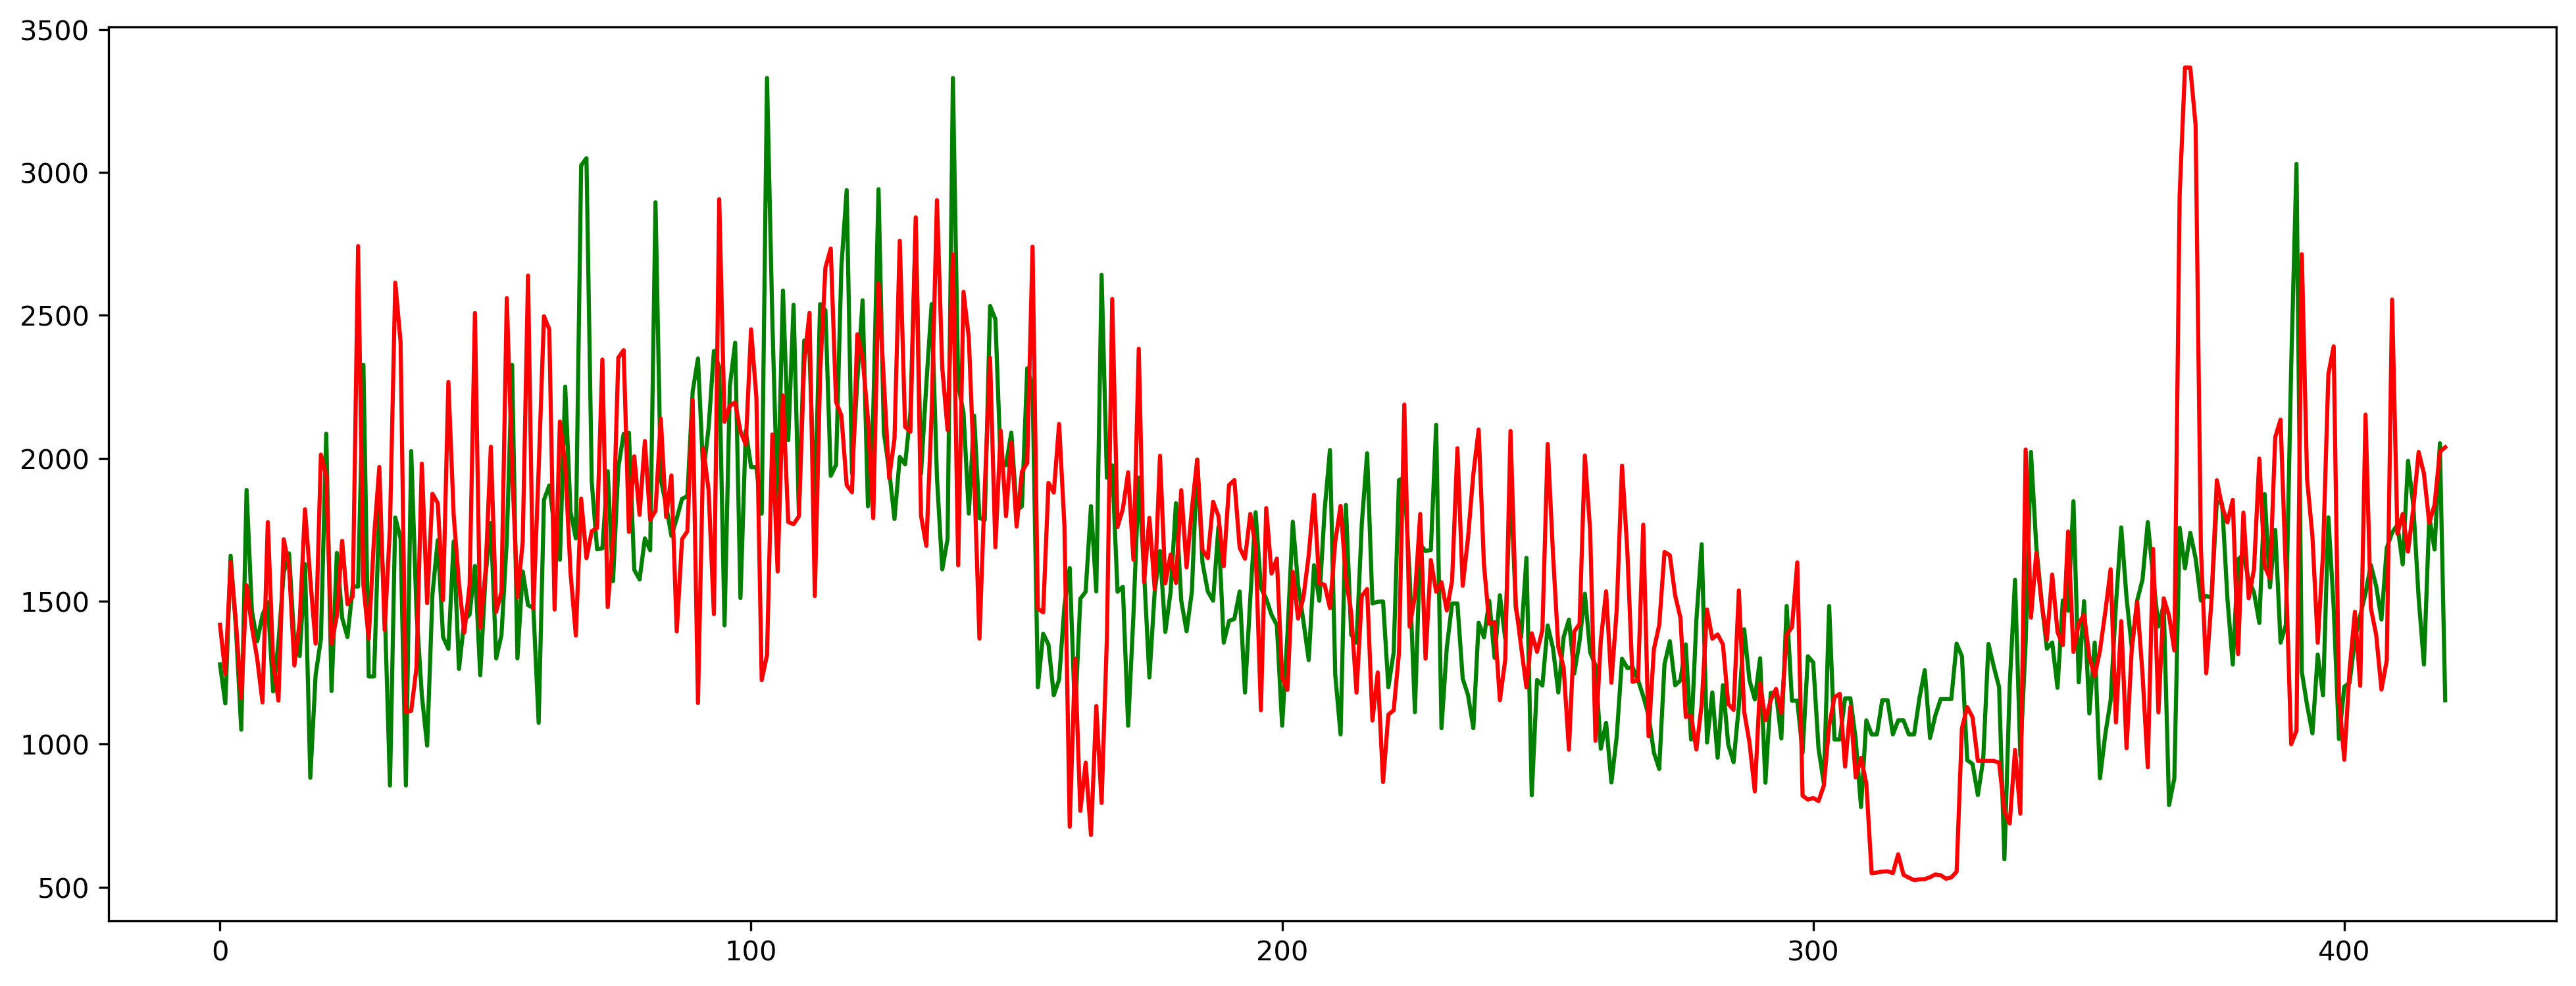

In [115]:
plt.figure(figsize=(16,6), dpi=300)
plt.plot(pre_xgboost_real,'g')
plt.plot(test_xgboost_real,'r')